In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#from fastbook import *
#from fastai.data.all import *
import fastai
from fastai.vision import *
from pathlib import Path

In [7]:
#import the necessary libaries
import os
from pathlib import Path
import sys
import pdb
import logging
import traceback

import pandas as pd

from functools import partial

import fastai

from fastai.basic_train import LearnerCallback, Learner, DataBunch, SmoothenValue, to_data, functools, \
    add_metrics, Module, nn
from fastai.imports import torch, F

import numpy as np
from torch.utils.data import Dataset

from numbers import Integral
import gc

import torchvision

In [8]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [9]:
#loading in the model
#Creating the labelled image databunch with batch size 16 and image size 128, 128
batch_size = 16
train_image_size = (128, 128)
image_dir = Path("/content/drive/My Drive/data_final/DATA FINAL/")
tfms = get_transforms()
labeled_data = ImageDataBunch.from_folder(image_dir, train = '.',
                                   ds_tfms=tfms,size=train_image_size,valid_pct = 0.2, bs = batch_size).normalize(imagenet_stats)


In [10]:
learn = cnn_learner(labeled_data, models.resnet34, metrics=accuracy)
learn.load('/content/drive/Shared drives/module 2 rock videos/res18')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Learner(data=ImageDataBunch;

Train: LabelList (2571 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
mixed,mixed,mixed,mixed,mixed
Path: /content/drive/My Drive/data_final/DATA FINAL;

Valid: LabelList (642 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
chip,chip,chip,lump,pellets
Path: /content/drive/My Drive/data_final/DATA FINAL;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [11]:
def sample_fastai(img_orig, x, y, win_size, cnn_size):
  #h, w, = img.shape
  img = Image(pil2tensor(img_orig, dtype=np.float32).div_(255))
  
  h, w, = img.shape[1], img.shape[2]

  delta = int(win_size/2)

  x0 = x - delta 
  x1 = x + delta
  y0 = y - delta
  y1 = y + delta

  if y0 < 0:
      y0 = int(0)
      y1 = int(win_size * 2)
  
  if y1 > h:
      y0 = int(h - win_size * 2)
      y1 = int(h)
  
  if x0 < 0:
      x0 = int(0)
      x1 = int(win_size * 2)
  
  if x1 > w:
      x0 = int(w - win_size * 2)
      x1 = int(w)

  img_sample = img.crop((x0,y0,x1,y1))

  # convert to CNN format
  #img_cnn = cv2.resize(img_sample, (cnn_size,cnn_size))
  #img_cnn = np.ndarray.astype(img_cnn, np.float32) / 255
  #img_cnn = np.reshape(img_cnn, (cnn_size, cnn_size, 3))
  img_cnn = img_sample.resize(cnn_size)

  return img_cnn, [x0,x1,y0,y1]

In [23]:
N_frames

1470

In [18]:
#load model
learn = cnn_learner(labeled_data, models.resnet34, metrics=accuracy)
learn.load('/content/drive/Shared drives/module 2 rock videos/res18')

Learner(data=ImageDataBunch;

Train: LabelList (2571 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
mixed,mixed,mixed,mixed,mixed
Path: /content/drive/My Drive/data_final/DATA FINAL;

Valid: LabelList (642 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
chip,chip,chip,lump,pellets
Path: /content/drive/My Drive/data_final/DATA FINAL;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [21]:
N_frames

0

In [ ]:
from PIL import Image as PImage
from fastai.vision import *

vid_path = "/content/drive/Shared drives/DSI Shared Folder/Module 2/Twist Data/bin_3.mp4"

cap = cv2.VideoCapture(vid_path)
N_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

sample_window_size = 75 # in pixels
cnn_img_size = 200 #

class_comp = []

tic = time.process_time()

#dataframe to save the predictions of each frame
frame_preds = pd.DataFrame(index = [0, 1, 2, 3, 4])

for frame in range(N_frames):
  has_img, img = cap.read()
  #fines = chip =  pellets = lump = mixed = 0

  if has_img:
    # Images in your trainging set were monochrome

    #crop the image
    crop_img = img[30:430, 145:420]
    img_mono = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    #img_fastai = Image(pil2tensor(img_mono, dtype=np.float32).div_(255))


    # take n number of samples from reqions around the frame
    n = 5

    x_offset = np.linspace(0, 150, n)
    x_offset = np.random.permutation(x_offset)

    y_offset = np.linspace(0, 100, n)
    y_offset = np.random.permutation(y_offset)

    #create list to save predictions of sample

    sample_preds = []

    #loop through each sample
    for i in range(n):
      # Grab a sample from the image. X=0, Y=0 is the top left corner. X and Y indicates the center of the sample.
      x = 200 + x_offset[i]
      y = 140 + y_offset[i]

      #single sample
      sample, rect = sample_fastai(img, int(x), int(y), sample_window_size, cnn_img_size)

      # TODO: CLASSIFER CODE HERE. ->predict on sample
      pred_class, pred_idx, outputs =  learn.predict(sample)
      

      #save the predictions
      sample_preds.append(pred_class.obj)

      

    # TODO: DECIDE IF NOFITICATION FRAME SHOUD BE SAVED
    #first get the majority class of each sample
    samp_series = pd.Series(sample_preds)
    #store the classes in the dataframe

    frame_preds[str(frame)] = samp_series

    #get the class that appears the most in the series
    frame_class = samp_series.mode()


    print(frame_class)
    if str(frame_class) == 'fines':
      img = Image.fromarray(img, 'RGB')
      img.save('/content/drive/Shared drives/module 2 rock videos/notifications/frame_' + str(frame) + '.png')




    # TODO: BUILD ARRAY FOR MATERIAL COMPOSITION GRAPH

    # COLAB
    # - - - - - - - - - - - - 
    #clear_output(wait=True)
    #cv2_imshow(sample) 
    #cv2.waitKey(1000) & 0xff
    # - - - - - - - - - - - - 

    # Local
    # - - - - - - - - - - - - 
    #cv2.imshow(img_mono)
    #cv2.waitKey(1000)
    # - - - - - - - - - - - -  

dt = time.process_time() - tic
print(N_frames)
print(dt/N_frames) # Samples per frame should be below 150 ms

0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype: object
0    chip
dtype:

In [62]:
frame_preds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476
0,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,mixed,chip,chip,chip,chip,chip,mixed,mixed,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,...,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,fines,fines
1,mixed,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,mixed,chip,mixed,chip,mixed,chip,chip,chip,mixed,chip,chip,chip,chip,mixed,chip,mixed,chip,mixed,chip,chip,chip,chip,chip,chip,chip,chip,chip,mixed,chip,...,chip,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,chip,mixed,mixed,mixed,chip,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,fines,mixed,fines
2,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,mixed,mixed,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,mixed,chip,chip,chip,chip,chip,chip,chip,chip,...,mixed,mixed,mixed,mixed,mixed,chip,mixed,mixed,mixed,mixed,chip,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,chip,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,chip,chip,fines
3,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,mixed,chip,chip,chip,chip,chip,chip,mixed,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,...,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,chip,mixed,chip,mixed,mixed,mixed,mixed,mixed,mixed,mixed,chip,mixed,mixed,mixed,mixed,mixed,mixed,mixed,fines,mixed,mixed
4,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,chip,mixed,...,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,chip,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,mixed,chip,mixed,mixed,mixed,mixed,mixed,fines,fines,mixed


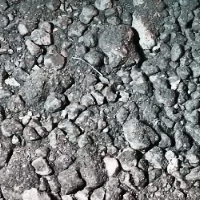

In [29]:
sample

In [42]:
img_mono

array([[130, 108,  44, 114, ..., 172, 178, 159, 150],
       [185, 146,  50,  84, ..., 160, 181, 163, 131],
       [150,  49,  44,  42, ..., 151, 177, 203, 223],
       [125,  59,  73,  36, ..., 195, 132, 189, 230],
       ...,
       [233, 203, 159, 192, ...,   9,  29,  22,  35],
       [217, 208,  99, 173, ...,  64,  45,  43,  31],
       [201, 175,  39, 174, ...,  77,  39,  47,  16],
       [181, 145,  36, 180, ...,  46,  38,  78,  35]], dtype=uint8)

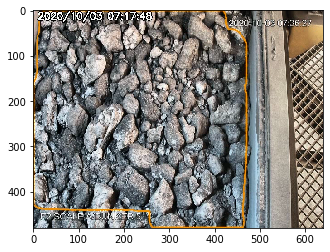

In [45]:
from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest')
plt.show()

In [49]:
from PIL import Image

# red patch in upper left
img = Image.fromarray(img, 'RGB')

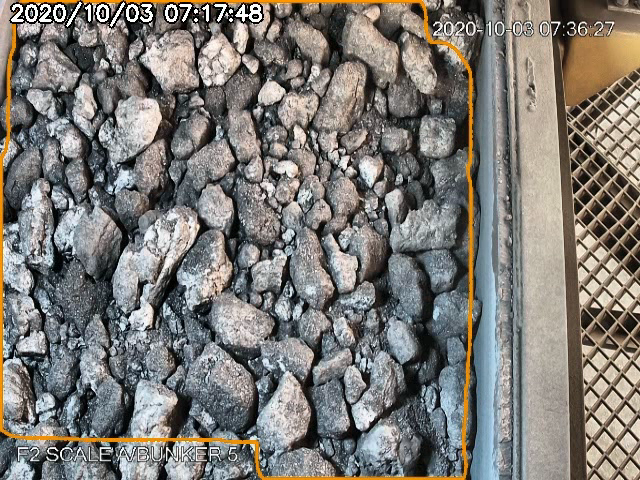

In [51]:
img